In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Get the data and superficially analyze

In [3]:
food_df = pd.read_csv('/content/drive/MyDrive/CodingDojo/Project1/sales_predictions.csv')

In [4]:
food_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Dive deeper into analysis

In [5]:
# Seems like Low Fat = LF = low fat         and          Regular = reg

food_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [6]:
# Item_Weight and Outlet_Size are the only columns with NaN values
# ignoring the rows where NaN values are found would be unwise, as they represent a large percentage of the rows
# how the Item_Weight and Outlet_Size columns will be used is still not defined, so there is a possibility that these columns can be ignored

# Randomly assigning values to the missing values would also be unwise, because with this many missing values it might confuse a ML algorithm

food_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# No capitalization (or other types of) differences

food_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [8]:
# Grocery Stores have the lowest Item_Outlet_Sales by far, with Type2 following, then Type1, then Type3 with a large lead
# Perhaps this could be a method to find what the missing values in Outlet_Type are?

food_df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


# Start cleaning the data and issues found in analysis

## Item_Fat_Contents separate values for same meaning

In [9]:
# For Item_Fat_Content, we want to turn the 5 different values into only two ('Low Fat' and 'Regular')
LF_filter = food_df['Item_Fat_Content'] == 'LF'
lowfat_filter = food_df['Item_Fat_Content'] == 'low fat'

In [10]:
food_df.loc[LF_filter | lowfat_filter,'Item_Fat_Content'] = 'Low Fat'

In [11]:
food_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [12]:
reg_filter = food_df['Item_Fat_Content'] == 'reg'

In [13]:
food_df.loc[reg_filter,'Item_Fat_Content'] = 'Regular'

In [14]:
food_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
# To determine statistical significance more analysis is required, but it seems as though Low Fat has a slightly lower Item_Outlet_Sales mean than Regular

food_df.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2157.711534
Regular,2224.561170


## Imputing missing values

In [16]:
# Some problems with imputing values from Outlet_Size are:
#   the values are discrete, there are only 3 possible levels ('Small', 'Medium', 'High')
#   there are many rows with missing data
#   it is possible that the outlet size does not affect other factors, so guessing is not possible for humans, and machines might have a hard time with it

In [17]:
food_df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [18]:
nanOS_filter = food_df['Outlet_Size'].isna()

In [19]:
# The closest average of the NaN values when compared to the existing Outlet_Types is Supermarket Type1, only differing by 6 units, but the range is very large (13,053)
# so the reliability is questionable. The implications of imputing all the NaN values with Supermarket Type1 are still not understood well enough, though imputing them
# with Type1 is a good candidate option
# Alternatively, probably a smarter option would be to change it on an individual basis, depending on what the closest average is... for example, for an item with
# Item_Outlet_Sales value of 30, the Outlet_Type might be Grocery Store, because it is the closest, similarly for an item with 2300, the Outlet_Type might be Type1

print(food_df[~nanOS_filter]['Item_Outlet_Sales'].mean())
print(food_df[~nanOS_filter]['Item_Outlet_Sales'].max() - food_df[~nanOS_filter]['Item_Outlet_Sales'].min())

2322.68844544414
13053.009


# Exploratory Data Analysis

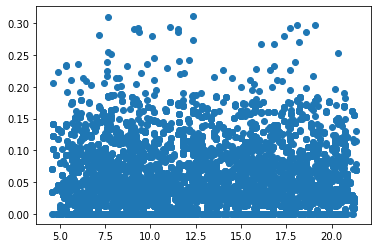

In [23]:
# For the missing values in Item_Weight, I would like to plot a graph of the weights and some other variable, perhaps finding some correlation.
plt.scatter(x=food_df['Item_Weight'],y=food_df['Item_Visibility'])

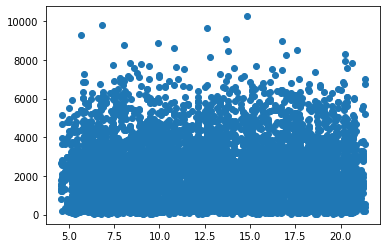

In [24]:
# There seems to be no easily found relationship between Item_Weight and either of these continuous variables
plt.scatter(x=food_df['Item_Weight'],y=food_df['Item_Outlet_Sales'])

In [29]:
food_df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [28]:
food_df.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2157.711534
Regular,2224.561170


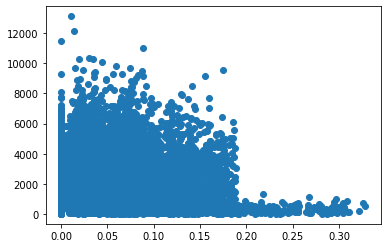

In [33]:
# After a certain amount of visibility, total revenue from the item seems to be stagnant.
plt.scatter(x=food_df['Item_Visibility'],y=food_df['Item_Outlet_Sales'])

In [80]:
food_df.groupby(['Item_Type'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

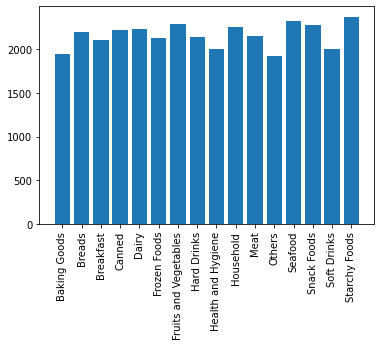

In [71]:
# Manually making a list of the values, because otherwise it was giving me an error
myheight = [1952.971207, 2204.132226, 2111.808651, 2225.194904, 2232.542597, 2132.867744, 2289.009592, 2139.221622, 2010.000265, 2258.784300, 2158.977911, 1926.139702,
2326.065928, 2277.321739, 2006.511735, 2374.332773]
############################# CHECK FOR A BETTER WAY TO DO THIS ##################################

plt.bar(x = list(food_df.groupby(['Item_Type'])[['Item_Outlet_Sales']].mean().index), height = myheight)
plt.xticks(rotation=90)

# There does not seem to be a lot of variation on the Item_Outlet_Sales, but maybe that small difference is significant.

In [83]:
# As mentioned earlier:

# Grocery Stores have the lowest Item_Outlet_Sales by far, with Type2 following, then Type1, then Type3 with a large lead
# Perhaps this could be a method to find what the missing values in Outlet_Type are?

food_df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


# Explanatory Data Analysis

In [77]:
fig = px.density_contour(food_df, x='Item_Visibility',y='Item_Outlet_Sales',marginal_x='histogram',marginal_y='histogram')
fig.show()

# What can be taken away from this density contour plot is that a higher Item_Visibility values tends to indicate lower Item_Outlet_Sales
# and even though most of the samples have low item_visibility AND low item_outlet_sales, it appears as though only items with low visibility
# have high outlet sales (though, once again, not most items with low visibility have low item outlet sales anyway).

In [89]:
fig = px.bar(food_df, x='Item_Type', y="Item_Outlet_Sales", color='Outlet_Type', barmode="group")
fig.show()

# This separation by colors helps us see that Type1 supermarkets lead total Item_Outlet_Sales in our data set, followed by Type3, then Type2, then Grocery Store
# Also, we are able to see where most of the revenue comes from for each individual type of outlet.